[RAG chatbot using llama3](https://huggingface.co/blog/not-lain/rag-chatbot-using-llama3)

In [1]:
!pip install sentence-transformers langchain transformers faiss-gpu langchain-community -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.6 MB/s eta 0:00:00


In [2]:
!pip install -U pypdf -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 7.5 MB/s eta 0:00:00


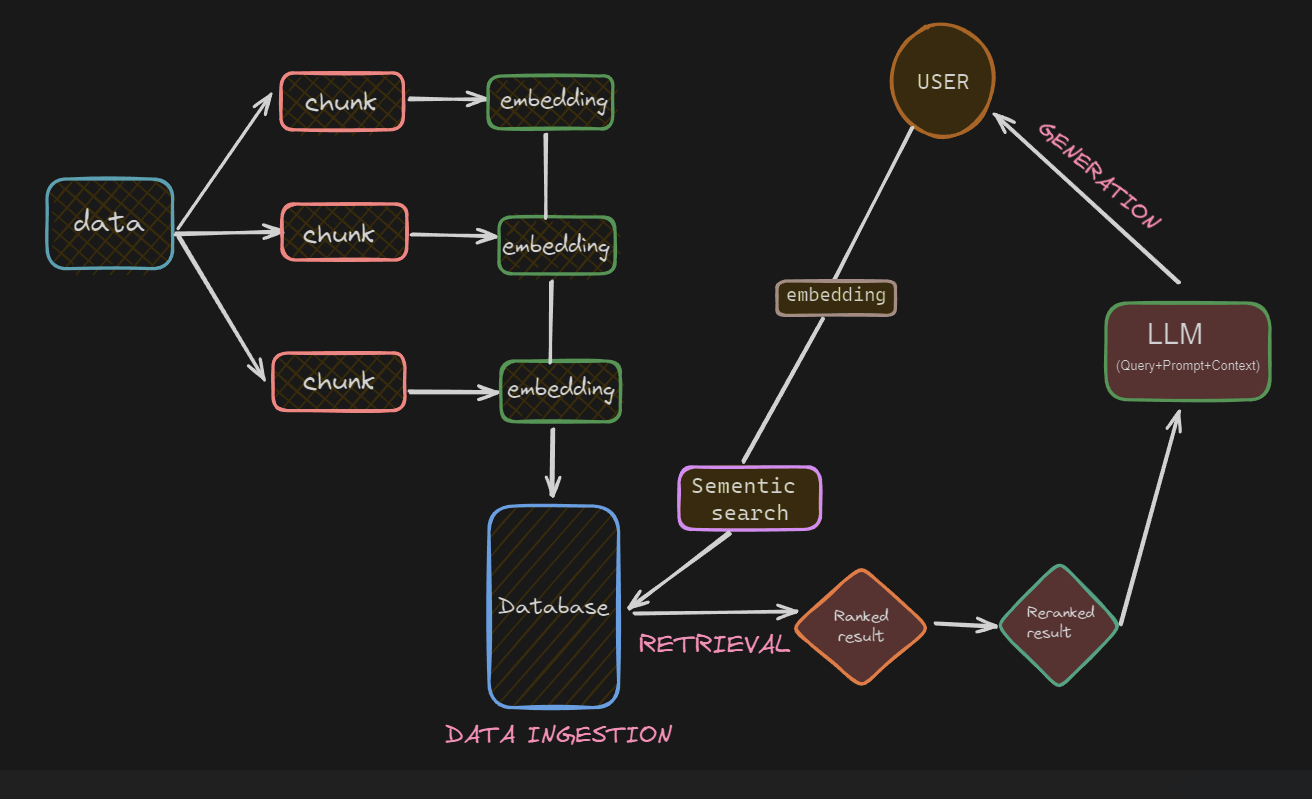

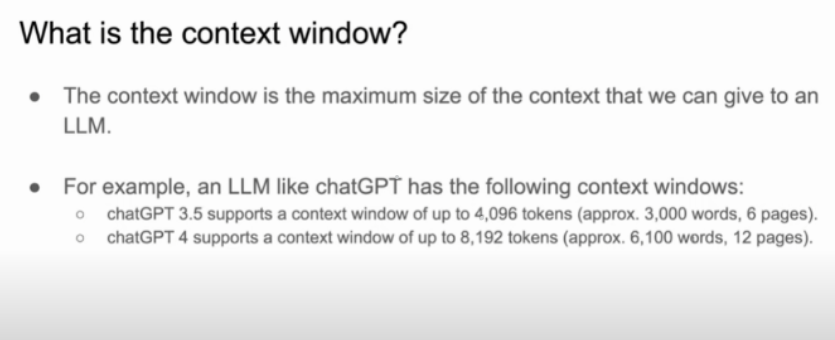

# RAG Having Three main Stages

1. Data Ingestion
2. Data Retrieval
3. Data Generation

In [3]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA

In [8]:
import os
print(os.listdir('/content/drive/MyDrive/Projects/LLMs/'))


['Automating_Knowledge_Discovery_from_Scientific_Literature_via_LLMs_ADual-Agent_Approach_POP.pdf']


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path = '/content/drive/MyDrive/Projects/LLMs/Automating_Knowledge_Discovery_from_Scientific_Literature_via_LLMs_ADual-Agent_Approach_POP.pdf'
loader = PyPDFLoader(path)
documents = loader.load()


In [10]:
text_splitter = CharacterTextSplitter(chunk_size=2000, chunk_overlap=30, separator="\n")
docs = text_splitter.split_documents(documents=documents)

# MTEB: Massive Text Embedding Benchmark

#### The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

BGE(BAAI general embedding)
BAAI: https://huggingface.co/BAAI

**Dataset size:**  Larger datasets generally benefit from more powerful models like MPNet.

**Computational resources:**  If you have limited resources, BGE Small En or MiniLM might be better options.

**Task complexity:**  For complex tasks like question answering or text summarization, MPNet is often preferred.

**Embedding dimensionality:**  Different models produce embeddings of varying dimensions.Choose based on downstream task requirements.

**Performance vs. efficiency trade-off:** Decide if you prioritize high accuracy or faster processing

#####Experimentation is key. Try different models and evaluate their performance on your specific task and dataset to find the best fit.

MPNET: Masked and Permuted Pre-training for Language Understanding.

https://huggingface.co/sentence-transformers

https://huggingface.co/spaces/mteb/leaderboard

https://huggingface.co/blog/mteb


In [11]:
embedding_model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {"device": "cuda"}
embeddings = HuggingFaceEmbeddings(
  model_name = embedding_model_name,
  model_kwargs = model_kwargs
)

<ipython-input-11-063f874c2193>:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Why Use FAISS

1. Efficiency
2. Versatility
3. Scalability
4. Integration
5. GPU Support

# Security Considerations

1. Data Control
2. Reduced Exposure
3. Compliance
4. Latency and Performance
5. Network Security

In [12]:
'''
from langchain.vectorstores import FAISS
vectorstore=FAISS.from_documents(text_chunks, embeddings)
retriever=vectorstore.as_retriever()
'''

'\nfrom langchain.vectorstores import FAISS\nvectorstore=FAISS.from_documents(text_chunks, embeddings)\nretriever=vectorstore.as_retriever()\n'

In [13]:
vectorstore = FAISS.from_documents(docs, embeddings)


In [14]:
vectorstore.save_local("faiss_index_")

In [15]:
persisted_vectorstore = FAISS.load_local("faiss_index_", embeddings, allow_dangerous_deserialization=True)

In [16]:
retriever = persisted_vectorstore.as_retriever()

In [17]:
!pip install langchain_ollama -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.9 MB/s eta 0:00:00


In [18]:
# !pip install colab-xterm
# %load_ext colabxterm

# %xterm

curl -fsSL https://ollama.com/install.sh | sh

ollama serve & ollama pull llama3.1

In [19]:
!sudo apt update
!sudo apt install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,197 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,563 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/

In [20]:
import threading
import subprocess
import time

def run_ollama_serve():
  subprocess.Popen(["ollama", "serve"])

thread = threading.Thread(target=run_ollama_serve)
thread.start()
time.sleep(5)

In [21]:
!ollama pull llama3.1

pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠴ pulling manifest ⠴ pulling manifest ⠧ pulling manifest ⠇ pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏    0 B/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏ 710 KB/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   0% ▕▏ 7.2 MB/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   1% ▕▏  31 MB/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   1% ▕▏  60 MB/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   2% ▕▏  78 MB/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   2% ▕▏ 114 MB/4.9 GB                  pulling manifest 
pulling 667b0c1932bc...   3% ▕▏ 142 MB/4.9 GB                  pulling manifest 
pulling 667b0c1932bc

In [22]:
from langchain_community.llms import Ollama

In [23]:
llm = Ollama(model="llama3.1")

<ipython-input-23-327bc4a97484>:1: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="llama3.1")


In [24]:
response = llm.invoke("Tell me a joke")
print(response)

Here's one:

What do you call a fake noodle?

(wait for it...)

An impasta!

Hope that made you smile! Do you want to hear another one?


In [31]:
'''from langchain_ollama.llms import OllamaLLM
#loading the ollama model
model = OllamaLLM(model="llama3.1")'''

'from langchain_ollama.llms import OllamaLLM\n#loading the ollama model\nmodel = OllamaLLM(model="llama3.1")'

In [26]:
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=retriever)

In [27]:
while True:
  query = input("Type your query if you want to exit type Exit: \n")
  if query == "Exit":
    break
  result = qa.run(query)
  print(result)

Type your query if you want to exit type Exit: 
What's the name of the pdf?


<ipython-input-27-2c2904b563cb>:5: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa.run(query)


I don't know. There is no mention of a PDF in the provided text. The question seems to be unrelated to the context about LLM-Duo-RAG models and annotation performance.
Type your query if you want to exit type Exit: 
What's the title?
I don't know. There is no question about the title in the provided text.
Type your query if you want to exit type Exit: 
tell me about abstract
It appears that there is no direct question or context related to an abstract. The provided text discusses various topics such as speech therapy intervention themes, a comparative study on ChatGPT and fine-tuned BERT, and the use of large language models for automating knowledge discovery in scientific literature.

If you could provide more specific information or ask a clear question related to an abstract, I would be happy to try and assist you.
Type your query if you want to exit type Exit: 
what is knowledge discover?
Knowledge discovery refers to the process of extracting and understanding relevant information

KeyboardInterrupt: Interrupted by user

In [29]:
query1= "tell me about abstract"
query2= "what is knowledge discover?"

In [30]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM
from IPython.display import Markdown

template = """Question: {question}

Answer: Let's think step by step."""

prompt = ChatPromptTemplate.from_template(template)

model = OllamaLLM(model="llama3.1")

chain = prompt | model

display(Markdown(chain.invoke({"question": "What's the length of hypotenuse in a right angled triangle"})))

ConnectError: [Errno 111] Connection refused